The goal for the project is to look at the amounts of various contaminants (PM10, PM2_5, CO, N02, SO2) in all the cities in Metro Manila over time, from January 2025 to April 2025.

We will use this Python Wrapper for OpenMeteo found on github.(https://github.com/m0rp43us/openmeteopy/blob/main/readme/AIR_QUALITY.md). We install its library from git below:

In [1]:
pip install git+https://github.com/m0rp43us/openmeteopy

  Cloning https://github.com/m0rp43us/openmeteopy to /tmp/pip-req-build-uknra2o2
  Running command git clone --filter=blob:none --quiet https://github.com/m0rp43us/openmeteopy /tmp/pip-req-build-uknra2o2
  Resolved https://github.com/m0rp43us/openmeteopy to commit be76f2deabd7ff5ec3f87ebc983091a367e24117
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.0/739.0 kB 37.5 MB/s eta 0:00:00
  Created wheel for openmeteopy: filename=openmeteopy-0.1.0-py3-none-any.whl size=64551 sha256=8a1285f5e4dc8fdc7e9a6a33c58668cc4d6906c4520f5e731a03f89d1ee54560
  Stored in directory: /tmp/pip-ephem-wheel-cache-flqq8b6s/wheels/53/e4/b5/687b5a6197913f4c83e0c3201bd5d39ce74fff69be9956cfa3
Successfully built openmeteopy


In [2]:
#Importing basic necessary python libraries and modules
import pandas as pd
import numpy as np
import requests, json #for getting requests from apis
import matplotlib.pyplot as plt

We install geopy to be able to geocode and retrieve the lattitude and longitude coordinates from a given list of names of all the cities in Metro Manila

In [3]:
pip install geopy

In [4]:
import time
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter #So that we dont overload geopy with too many requests

metro_manila_cities = [
    "Caloocan", "Las Piñas", "Makati", "Malabon", "Mandaluyong",
    "Manila", "Marikina", "Muntinlupa", "Navotas", "Parañaque",
    "Pasay", "Pasig", "Quezon City", "San Juan", "Taguig",
    "Valenzuela", "Pateros"
]

geolocator = Nominatim(user_agent="hello")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

We set up a list of names for all the cities in metro manila to feed to the geopy

We initialize and empty dictionary named city_coords to store the city name as a key with the lattitude and longitude coordinates and value pairs

In [5]:
city_coords = {}

for city in metro_manila_cities:
  location = geocode(city)
  city_coords[city] = (location.latitude, location.longitude)
  print(f"Coordinates for {city}: {city_coords[city]}")

Coordinates for Caloocan: (14.651348, 120.9724002)
Coordinates for Las Piñas: (14.4809012, 120.9817861)
Coordinates for Makati: (14.5567949, 121.0211226)
Coordinates for Malabon: (14.6578504, 120.9511261)
Coordinates for Mandaluyong: (14.5774392, 121.0338973)
Coordinates for Manila: (14.5904492, 120.9803621)
Coordinates for Marikina: (14.6331084, 121.0993541)
Coordinates for Muntinlupa: (14.3892634, 121.0449101)
Coordinates for Navotas: (14.6571862, 120.9479692)
Coordinates for Parañaque: (14.5008116, 120.9915327)
Coordinates for Pasay: (14.5436995, 120.9946503)
Coordinates for Pasig: (14.5605166, 121.0764343)
Coordinates for Quezon City: (14.6510546, 121.0486254)
Coordinates for San Juan: (18.384239049999998, -66.05343997364733)
Coordinates for Taguig: (14.5270538, 121.0744942)
Coordinates for Valenzuela: (14.6916903, 120.9694534)
Coordinates for Pateros: (14.5447555, 121.067134)


In [6]:
city_coords #double checking the dictionary of city name and coordinates

{'Caloocan': (14.651348, 120.9724002),
 'Las Piñas': (14.4809012, 120.9817861),
 'Makati': (14.5567949, 121.0211226),
 'Malabon': (14.6578504, 120.9511261),
 'Mandaluyong': (14.5774392, 121.0338973),
 'Manila': (14.5904492, 120.9803621),
 'Marikina': (14.6331084, 121.0993541),
 'Muntinlupa': (14.3892634, 121.0449101),
 'Navotas': (14.6571862, 120.9479692),
 'Parañaque': (14.5008116, 120.9915327),
 'Pasay': (14.5436995, 120.9946503),
 'Pasig': (14.5605166, 121.0764343),
 'Quezon City': (14.6510546, 121.0486254),
 'San Juan': (18.384239049999998, -66.05343997364733),
 'Taguig': (14.5270538, 121.0744942),
 'Valenzuela': (14.6916903, 120.9694534),
 'Pateros': (14.5447555, 121.067134)}

In [7]:
#importing the necessaryn modules and libraries to be able to use OpenMeteo
from openmeteopy import OpenMeteo
from openmeteopy.hourly import HourlyAirQuality
from openmeteopy.options import AirQualityOptions
from datetime import datetime

The steps below are to choose which contents in the air we wish to observe. These components of the air are commonly linked to adverse health effects and so their presences are key indicators of air quality

In [8]:
hourly = HourlyAirQuality()
hourly.pm10()
hourly.pm2_5()
hourly.carbon_monoxide()
hourly.nitrogen_dioxide()
hourly.sulphur_dioxide()

Next, we iterate through our dictionary of city coordinates, fetching the data for each city. They are then combined into one dataframe

In [ ]:
data = []

for city, coords in city_coords.items():
    latitude, longitude = coords
    options = AirQualityOptions(latitude, longitude, past_days=92) #unforunately due to api limitations, we can only look 92 days in the past
    mgr = OpenMeteo(options, hourly)
    meteo = mgr.get_pandas().reset_index()
    meteo["City"] = city
    data.append(meteo)

meteo_dataframe = pd.concat(data)
meteo_dataframe


Unfortunately, OpenMeteoPy has its limitations. Most of its parameters used for setting date ranges for data retrieval do not work. The only parameter that was found to be working was past_days which is unfortunately capped at 92. So, the data utilized in this analysis spans 92 days past the latest date this colab notebook is run. This unfortunately will mean that the insights and resulting from the data may not be relevant or accurate depending on when this notebook is last edited or run.

Below we ensure that the time column is in the correct datetime format and that we cap it's latest

In [ ]:
meteo_dataframe['time'] = pd.to_datetime(meteo_dataframe['time']) #ensuring that the entries in the time column are datetime objects
meteo_dataframe['Day'] = meteo_dataframe['time'].dt.day
meteo_dataframe['Date'] = meteo_dataframe['time'].dt.date
meteo_dataframe = meteo_dataframe[meteo_dataframe['Date'] <= pd.to_datetime('2025-04-08').date()]



In [ ]:
meteo_dataframe.describe()

We want to make sure that there are no duplicate entries in the dataset. We use the duplicated() function to see which entries in the dataset are duplicated. Then we can use drop

In [ ]:
meteo_dataframe.duplicated().sum()

In [ ]:
for pollutant in ['pm10', 'pm2_5', 'carbon_monoxide', 'nitrogen_dioxide', 'sulphur_dioxide']:
    plt.figure(figsize=(10, 6))
    plt.hist(meteo_dataframe[pollutant], bins=50)
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')
    plt.show()


We see that from the histograms above, that the distributions of the air pollutants are in

Below we extract the information from the "Time" column, and make dedicated columns for Month, Day, Time of day, and Hour

In [ ]:
AQI_BREAKPOINTS_UGM3 = {
    "pm10": [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300), (425, 604, 301, 500)],
    "pm2_5": [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 500.4, 301, 500)],

    # CO in µg/m³ (converted from ppm, using molar mass 28.01)
    "carbon_monoxide": [(0.0, 123.2, 0, 50), (123.3, 263.6, 51, 100), (263.7, 347.1, 101, 150),
                        (347.2, 431.0, 151, 200), (431.1, 850.6, 201, 300), (850.7, 1402.6, 301, 500)],

    # NO2 in µg/m³ (converted from ppb, using molar mass 46.01)
    "nitrogen_dioxide": [(0, 97.0, 0, 50), (98, 183.0, 51, 100), (184, 659.0, 101, 150),
                         (660, 1192.0, 151, 200), (1193, 2293.0, 201, 300), (2294, 3752.0, 301, 500)],

    # SO2 in µg/m³ (converted from ppb, using molar mass 64.07)
    "sulphur_dioxide": [(0, 89.0, 0, 50), (90, 185.0, 51, 100), (186, 457.0, 101, 150),
                        (458, 751.0, 151, 200), (752, 1488.0, 201, 300), (1489, 2466.0, 301, 500)],
}
# AQI Calculation Function
def calculate_aqi(concentration, breakpoints):
    if concentration < breakpoints[0][0]:
        return breakpoints[0][2]  # lowest AQI
    if concentration > breakpoints[-1][1]:
        return breakpoints[-1][3]  # highest AQI

    for C_low, C_high, I_low, I_high in breakpoints:
        if C_low <= concentration <= C_high:
            return round(((I_high - I_low) / (C_high - C_low)) * (concentration - C_low) + I_low)
    return None

for pollutant in AQI_BREAKPOINTS_UGM3.keys():
    meteo_dataframe[f"{pollutant}_aqi"] = meteo_dataframe[pollutant].apply(lambda x: calculate_aqi(x, AQI_BREAKPOINTS_UGM3[pollutant]))

meteo_dataframe["final_aqi"] = meteo_dataframe[[f"{pollutant}_aqi" for pollutant in AQI_BREAKPOINTS_UGM3.keys()]].max(axis=1)
meteo_dataframe['final_aqi_contributor'] = meteo_dataframe[[f"{pollutant}_aqi" for pollutant in AQI_BREAKPOINTS_UGM3.keys()]].idxmax(axis=1)

In [ ]:
meteo_dataframe = meteo_dataframe[meteo_dataframe['Date'] <= pd.to_datetime('2025-04-08').date()]
meteo_dataframe.info()

In [ ]:
meteo_dataframe[['final_aqi_contributor', 'City']].value_counts()

We see that the pollutant that contributes the most to the final aqi in all cities in metro manila is Carbon Dioxide, which severly dominates the second largest contributor to aqi, pm2_5

In [ ]:
meteo_dataframe.info()

We see that there are no null values in our data

Next, we import geopandas and osmnx. Geopandas is a library that will allow us to work with geo dataframes, and osmnx is OpenStreetMap's free API which will allow us to query the boundary data for all of the cities in Metro Manila

In [ ]:
!pip install osmnx
import osmnx as ox
import geopandas as gpd

metro_manila_cities = [
    "Manila", "Quezon City", "Caloocan", "Pasig", "Makati", "Taguig", "Parañaque",
    "Mandaluyong", "Las Piñas", "Muntinlupa", "Marikina", "Malabon", "Navotas",
    "San Juan", "Pasay", "Valenzuela", "Pateros"
]

gdfs = []

for city in metro_manila_cities:
    city_name = f"{city}, Metro Manila, Philippines"
    print(f"Downloading: {city_name}")
    gdf = ox.geocode_to_gdf(city_name, which_result =1)
    gdf["city"] = city
    gdfs.append(gdf)
    time.sleep(1)

# Combine and save
all_cities = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True), crs="EPSG:4326")
all_cities.to_file("metro_manila_city_boundaries.geojson", driver="GeoJSON")
print("Saved to metro_manila_city_boundaries.geojson")

We take the average of the final aqis per city and sort by descending order as we want to conduct our analysis on the top 3 citys with the highest aqis

In [ ]:
avg_aqi_per_city = meteo_dataframe.groupby('City')['final_aqi'].mean().reset_index().sort_values(by='final_aqi', ascending=False)
avg_aqi_per_city

Then, we combine the results with the queried city boundary data from osmnx using left join

In [ ]:
merged_data = all_cities.merge(avg_aqi_per_city, left_on='city', right_on='City', how='left')

After which we make a heatmap using plotly showcasing the average final aqis in each city. We also plot the specific points that were returned from geopy earlier which were used to query the air contents from geopy

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.choropleth_mapbox(
    merged_data,
    geojson=merged_data.geometry.__geo_interface__,
    locations=merged_data.index,
    color="final_aqi",
    hover_name="city",
    mapbox_style="carto-positron",
    center={"lat": 14.5995, "lon": 120.9842},
    zoom=9,
    opacity=0.5,
    color_continuous_scale="Reds",
    title="Average Air Quality Index (AQI) in Metro Manila"
)

fig.update_layout(margin={"r": 0, "t": 30, "l": 0, "b": 0})

fig.add_trace(                   #to make sure that each city coordinate is in the
    go.Scattermapbox(
        lat=[coords[0] for coords in city_coords.values()],
        lon=[coords[1] for coords in city_coords.values()],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=10,
            color='red'
        ),
        text=list(city_coords.keys()),
    )
)
fig.show()

We notice that some city boundaries extend far past the cities' landmass and into some bodies of water. This is as they are in Open Street Maps. Shown below is the boundary of Manila when searched for on the Open Street Maps website.

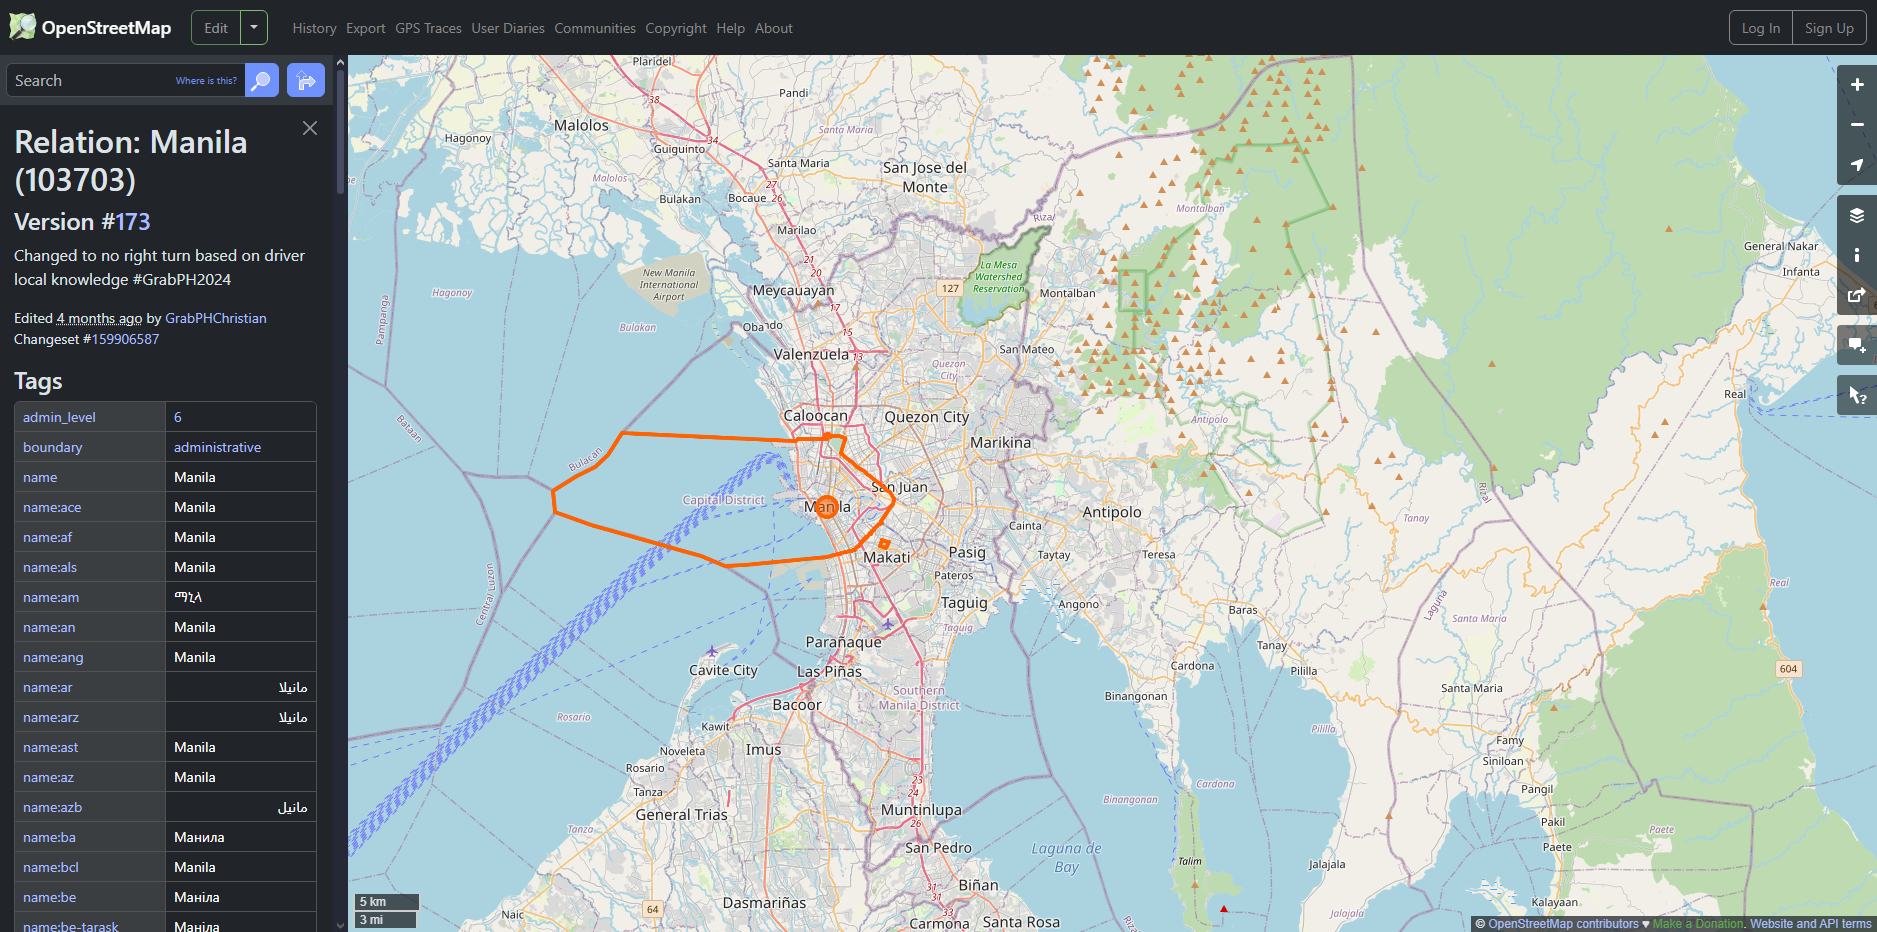



In [ ]:
avg_aqi_per_city = meteo_dataframe.groupby('City')['final_aqi'].mean().sort_values(ascending=False)
avg_aqi_per_city

Thus we see we look at the top three cities that have the worst average air quality, Pasig, Marikina, and Manila. It is important to note that some of the averaged final_aqi's are return the exact same value. This could be due to various reasons:


1.   The points of some cities maybe to close together resulting in the same final aqi readings
2.   Because aqi is calculated by utilizing threshold breakpoints, actual content of a pollutant may be different however their aqi may return the same value
3. We don't know how Open Meteo collects their readings for a given area. For example, the weather collection device may be used for a large area encompassing multiple cities, resulting in multiple cities having the same values.

Despite this, we will take the data as is and proceed with the analysis.



Below we plot the actual final aqi values in the cities with the highest average final aqi, Marikina, Pasig, and Manila, and the city with the lowest average final aqi, San Juan, starting from January 6, 2025 to April 4, 2025.

In [ ]:
import time
import plotly.express as px
from plotly.offline import iplot

for city in ['Pasig', 'Marikina', 'Manila', 'San Juan']:
    fig = px.line(meteo_dataframe[meteo_dataframe["City"] == city], x="time", y="final_aqi", color="City", title  = "Final AQI Score over time in " + city, range_x = ["2025-01-06 00:00:00", "2025-04-08 :00:00"])
    iplot(fig)
    time.sleep(2)

From the graphs of the final aqi's in the cities above, we see notable peaks on the dates of January 14 and February 14 in Marikina, Pasig, and Manila. In San Juan a notable peak in worsened air quality happend on March 1.

In [ ]:
most_polluted_df = meteo_dataframe[meteo_dataframe['City'].isin(['Marikina','Pasig','Manila'])]

most_polluted_df.info()

In [ ]:
Pasig_DF = most_polluted_df[most_polluted_df['City'] == 'Pasig']
Marikina_DF = most_polluted_df[most_polluted_df['City'] == 'Marikina']
Manila_DF = most_polluted_df[most_polluted_df['City'] == 'Manila']
San_Juan_DF = meteo_dataframe[meteo_dataframe['City'] == 'San Juan']

Now let us conduct relevant time series analysis to each of the data for Pasig, Marikina, Manila, and San Juan




#Pasig

First we start by inspecting the Data from Pasig at the hourly level. We look athe Trend, Seasonal, and Residual values for the final aqi of Pasig using the seasonal_decompose function from statsmodels.


For the hourly datasets, we will be plotting two seasonal decompose graphs. The first would be using matplotlib to observe the trends and residuals, and then plotly to better examin the hourly seasonality as it has superior customizability and interactability. Additionally, for the plotly graphs, and to observe the actual hourly seasonality, we will only plot the first 48 hours.



In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Pasig_DF['Log of aqi'] = np.log(Pasig_DF['final_aqi'])
#Pasig_DF.set_index('time', inplace=True)
result_Pasig = seasonal_decompose(Pasig_DF['final_aqi'], model='additive', period=24) #REMOVE [0:49] TO SEE THE FULL RESULT I JSUT DID THSI TO SEE THE SEASONALITY PROPERLY

print()
fig, axs = plt.subplots(4, 1, figsize=(20, 8), sharex=True)

axs[0].plot(result_Pasig.observed)
axs[0].set_ylabel('Observed')
axs[0].set_xlabel('Time')

axs[1].plot(result_Pasig.trend)
axs[1].set_ylabel('Trend')
axs[1].set_xlabel('Time')

axs[2].plot(result_Pasig.seasonal)
axs[2].set_ylabel('Seasonal')
axs[2].set_xlabel('Time')

axs[3].plot(result_Pasig.resid)
axs[3].set_ylabel('Residuals')
axs[3].set_xlabel('Time')

plt.suptitle('Seasonal Decomposition of Hourly AQI in Pasig', y=1.02)
plt.tight_layout()
plt.show()

We see that there does not seme to be a clear trend in the hourly final aqi in Pasig City. In terms of residuals plot, we see that the data during the first half (Januray and February) have a higher variance as compared to the latter half of the datapoints.

In [ ]:
import plotly.graph_objects as go

observed = go.Scatter(x=Pasig_DF['time'], y=result_Pasig.observed, mode='lines', name='Observed')
trend = go.Scatter(x=Pasig_DF['time'], y=result_Pasig.trend, mode='lines', name='Trend')
seasonal = go.Scatter(x=Pasig_DF['time'], y=result_Pasig.seasonal, mode='lines', name='Seasonal')
residual = go.Scatter(x=Pasig_DF['time'], y=result_Pasig.resid, mode='lines', name='Residual')


fig = go.Figure(data=[observed])
fig.update_layout(title='Observed',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[trend])
fig.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[seasonal])
fig.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[residual])
fig.update_layout(title='Residual',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()

We see that from the seasonality plot of Seasonal_Decompose that bad air quality conditions peak at midnight and at around noon each day. Conversly, the times at which final aqi is lowest are at 6 am and 6pm.

Now looking at pasig at the daily level. To do this we must convert the granularity from the hourly level to the daily level by aggregating (mean).

In [ ]:
Pasig_DF_Daily = Pasig_DF.groupby(pd.Grouper(key = 'time', freq = 'D'))['final_aqi'].mean().reset_index()

In [ ]:
Pasig_DF_Daily

In [ ]:
result_Pasig = seasonal_decompose(Pasig_DF_Daily['final_aqi'], model='additive', period=24) #REMOVE [0:49] TO SEE THE FULL RESULT I JSUT DID THSI TO SEE THE SEASONALITY PROPERLY

print()
fig, axs = plt.subplots(4, 1, figsize=(20, 8), sharex=True)

axs[0].plot(result_Pasig.observed)
axs[0].set_ylabel('Observed')
axs[0].set_xlabel('Time')

axs[1].plot(result_Pasig.trend)
axs[1].set_ylabel('Trend')
axs[1].set_xlabel('Time')

axs[2].plot(result_Pasig.seasonal)
axs[2].set_ylabel('Seasonal')
axs[2].set_xlabel('Time')

axs[3].plot(result_Pasig.resid)
axs[3].set_ylabel('Residuals')
axs[3].set_xlabel('Time')

plt.suptitle('Seasonal Decomposition of AQI Daily Aqi in Pasig', y=1.02)
plt.tight_layout()
plt.show()

Interestingly, we now see that there is some declining trend in the daily aqi in Pasig as it decreases from the first half to the latter half of the months of Januray to April.

In [ ]:
import plotly.graph_objects as go

observed = go.Scatter(x=Pasig_DF_Daily['time'], y=result_Pasig.observed, mode='lines', name='Observed')
trend = go.Scatter(x=Pasig_DF_Daily['time'], y=result_Pasig.trend, mode='lines', name='Trend')
seasonal = go.Scatter(x=Pasig_DF_Daily['time'], y=result_Pasig.seasonal, mode='lines', name='Seasonal')
residual = go.Scatter(x=Pasig_DF_Daily['time'], y=result_Pasig.resid, mode='lines', name='Residual')


fig = go.Figure(data=[observed])
fig.update_layout(title='Observed',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[trend])
fig.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[seasonal])
fig.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[residual])
fig.update_layout(title='Residual',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()

Interestingly enough, at the daily level we see

In [ ]:
Pasig_DF['Log of Final AQI'] = np.log(Pasig_DF['final_aqi'])
plt.plot(Pasig_DF['Log of Final AQI'])

In [ ]:
plt.plot(Pasig_DF['final_aqi'])

In [ ]:
plt.hist(Pasig_DF['final_aqi'])

In [ ]:
plt.hist(Pasig_DF['Log of Final AQI'])

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(Pasig_DF_Daily['final_aqi'])

# Display the ADF test results
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'Critical Values: {adf_result[4]}')

# Interpretation
if adf_result[1] < 0.05:
    print("The time series is stationary (p-value < 0.05).")
else:
    print("The time series is non-stationary (p-value >= 0.05).")


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(Pasig_DF_Daily['final_aqi'])

# Display the ADF test results
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'Critical Values: {adf_result[4]}')

# Interpretation
if adf_result[1] < 0.05:
    print("The time series is stationary (p-value < 0.05).")
else:
    print("The time series is non-stationary (p-value >= 0.05).")


Interestingly enough, when we conduct the ADF test for stationaity on our hourly granularity data, the result is that the data is stationary. However, upon conducting the test on our daily level data, the result is non-stationary

#Marikina

In [ ]:
result_Marikina = seasonal_decompose(Marikina_DF['final_aqi'], model='additive', period=24)

print()
fig, axs = plt.subplots(4, 1, figsize=(20, 8), sharex=True)

axs[0].plot(result_Marikina.observed)
axs[0].set_ylabel('Observed')
axs[0].set_xlabel('Time')

axs[1].plot(result_Marikina.trend)
axs[1].set_ylabel('Trend')
axs[1].set_xlabel('Time')

axs[2].plot(result_Marikina.seasonal)
axs[2].set_ylabel('Seasonal')
axs[2].set_xlabel('Time')

axs[3].plot(result_Marikina.resid)
axs[3].set_ylabel('Residuals')
axs[3].set_xlabel('Time')

plt.suptitle('Seasonal Decomposition of Hourly AQI in Pasig', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

observed = go.Scatter(x=Marikina_DF['time'], y=result_Marikina.observed, mode='lines', name='Observed')
trend = go.Scatter(x=Marikina_DF['time'], y=result_Marikina.trend, mode='lines', name='Trend')
seasonal = go.Scatter(x=Marikina_DF['time'], y=result_Marikina.seasonal, mode='lines', name='Seasonal')
residual = go.Scatter(x=Marikina_DF['time'], y=result_Marikina.resid, mode='lines', name='Residual')


fig = go.Figure(data=[observed])
fig.update_layout(title='Observed',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[trend])
fig.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[seasonal])
fig.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[residual])
fig.update_layout(title='Residual',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()

Same observation with Pasig, Two peaks, 12midngith and 1 PM

In [ ]:
Marikina_DF_Daily = Marikina_DF.groupby(pd.Grouper(key = 'time', freq = 'D'))['final_aqi'].mean().reset_index()

In [ ]:
result_Marikina = seasonal_decompose(Marikina_DF_Daily['final_aqi'], model='additive', period=7)
print()
fig, axs = plt.subplots(4, 1, figsize=(20, 8), sharex=True)

axs[0].plot(result_Marikina.observed)
axs[0].set_ylabel('Observed')
axs[0].set_xlabel('Time')

axs[1].plot(result_Marikina.trend)
axs[1].set_ylabel('Trend')
axs[1].set_xlabel('Time')

axs[2].plot(result_Marikina.seasonal)
axs[2].set_ylabel('Seasonal')
axs[2].set_xlabel('Time')

axs[3].plot(result_Marikina.resid)
axs[3].set_ylabel('Residuals')
axs[3].set_xlabel('Time')

plt.suptitle('Seasonal Decomposition of Hourly AQI in Pasig', y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go

observed = go.Scatter(x=Marikina_DF_Daily['time'], y=result_Marikina.observed, mode='lines', name='Observed')
trend = go.Scatter(x=Marikina_DF_Daily['time'], y=result_Marikina.trend, mode='lines', name='Trend')
seasonal = go.Scatter(x=Marikina_DF_Daily['time'], y=result_Marikina.seasonal, mode='lines', name='Seasonal')
residual = go.Scatter(x=Marikina_DF_Daily['time'], y=result_Marikina.resid, mode='lines', name='Residual')


fig = go.Figure(data=[observed])
fig.update_layout(title='Observed',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[trend])
fig.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[seasonal])
fig.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[residual])
fig.update_layout(title='Residual',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()

Same observation with Pasig

#Manila

In [ ]:
result_Manila = seasonal_decompose(Manila_DF['final_aqi'], model='additive', period=24)
result_Manila.plot()

trend = result_Manila.trend
seasonal = result_Manila.seasonal
residual = result_Manila.resid

In [ ]:
import plotly.graph_objects as go

observed = go.Scatter(x=Manila_DF['time'], y=result_Manila.observed, mode='lines', name='Observed')
trend = go.Scatter(x=Manila_DF['time'], y=result_Manila.trend, mode='lines', name='Trend')
seasonal = go.Scatter(x=Manila_DF['time'], y=result_Manila.seasonal, mode='lines', name='Seasonal')
residual = go.Scatter(x=Manila_DF['time'], y=result_Manila.resid, mode='lines', name='Residual')


fig = go.Figure(data=[observed])
fig.update_layout(title='Observed',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[trend])
fig.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[seasonal])
fig.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[residual])
fig.update_layout(title='Residual',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()

In [ ]:
Manila_DF_Daily = Manila_DF.groupby(pd.Grouper(key = 'time', freq = 'D'))['final_aqi'].mean().reset_index()

In [ ]:
result_Manila = seasonal_decompose(Manila_DF_Daily['final_aqi'], model='additive', period=7)
result_Manila.plot()

trend = result_Manila.trend
seasonal = result_Manila.seasonal
residual = result_Manila.resid

In [ ]:
import plotly.graph_objects as go

observed = go.Scatter(x=Manila_DF_Daily['time'], y=result_Manila.observed, mode='lines', name='Observed')
trend = go.Scatter(x=Manila_DF_Daily['time'], y=result_Manila.trend, mode='lines', name='Trend')
seasonal = go.Scatter(x=Manila_DF_Daily['time'], y=result_Manila.seasonal, mode='lines', name='Seasonal')
residual = go.Scatter(x=Manila_DF_Daily['time'], y=result_Manila.resid, mode='lines', name='Residual')


fig = go.Figure(data=[observed])
fig.update_layout(title='Observed',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[trend])
fig.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[seasonal])
fig.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[residual])
fig.update_layout(title='Residual',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()

#San Juan


In [ ]:
result_San_Juan = seasonal_decompose(San_Juan_DF['final_aqi'][0:49], model='additive', period=24)
result_San_Juan.plot()

trend = result_San_Juan.trend
seasonal = result_San_Juan.seasonal
residual = result_San_Juan.resid

In [ ]:
import plotly.graph_objects as go

observed = go.Scatter(x=San_Juan_DF['time'], y=result_San_Juan.observed, mode='lines', name='Observed')
trend = go.Scatter(x=San_Juan_DF['time'], y=result_San_Juan.trend, mode='lines', name='Trend')
seasonal = go.Scatter(x=San_Juan_DF['time'], y=result_San_Juan.seasonal, mode='lines', name='Seasonal')
residual = go.Scatter(x=San_Juan_DF['time'], y=result_San_Juan.resid, mode='lines', name='Residual')


fig = go.Figure(data=[observed])
fig.update_layout(title='Observed',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[trend])
fig.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[seasonal])
fig.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()
fig = go.Figure(data=[residual])
fig.update_layout(title='Residual',
                  xaxis_title='Time',
                  yaxis_title='Value')
fig.show()

In [ ]:
San_Juan_Daily = San_Juan_DF.groupby(pd.Grouper(key = 'time', freq = 'D'))['final_aqi'].mean().reset_index()

In [ ]:
result_San_Juan = seasonal_decompose(San_Juan_Daily['final_aqi'][0:49], model='additive', period=24)
result_San_Juan.plot()

trend = result_San_Juan.trend
seasonal = result_San_Juan.seasonal
residual = result_San_Juan.resid